In [10]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [24]:
pib_br = pd.read_excel(r"C:\Users\gabri\Downloads\PIB Brasil 1995-2024.xlsx")

pib_br['Data'] = pib_br['Data'].astype(str)
pib_br['Data'] = pib_br['Data'].str.replace('-', '/')
pib_br['Data'] = pd.to_datetime(pib_br['Data'], format= '%Y/%m')
pib_br = pib_br[(pib_br['Data'] >= '1995-01-01') & (pib_br['Data'] <= '2024-01-01')]
pib_br = pib_br.rename(columns={'PIB - R$ (milhões)  - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_PIB12 - ':'PIB Brasil'})
pib_br['PIB Brasil'] = pib_br['PIB Brasil'].apply(lambda x: '{:.2f}'.format(x))
pib_br['PIB Brasil'] = pib_br['PIB Brasil'].astype(float)

print(pib_br)
print(pib_br.dtypes)

          Data  PIB Brasil
0   1995-01-01     47028.6
1   1995-02-01     49954.5
2   1995-03-01     60024.3
3   1995-04-01     57789.5
4   1995-05-01     56350.5
..         ...         ...
344 2023-09-01    905975.8
345 2023-10-01    944016.2
346 2023-11-01    950525.3
347 2023-12-01    936798.8
348 2024-01-01    874397.9

[349 rows x 2 columns]
Data          datetime64[ns]
PIB Brasil           float64
dtype: object


In [26]:
ibov = pd.read_csv(r"C:\Users\gabri\Downloads\BVSP 1993-2024.csv", sep=",")
ibov = pd.DataFrame(ibov)
ibov['Date'] = ibov['Date'].astype(str)
ibov['Date'] = ibov['Date'].str.replace('-', '/')
ibov['Date'] = pd.to_datetime(ibov['Date'], format='%Y/%m/%d')
ibov = ibov.dropna()
ibov.set_index('Date', inplace=True)
ibov = ibov.resample('MS').first()
ibov.reset_index(inplace=True)
ibov = ibov[['Date', 'Close']]
ibov = ibov.rename(columns={'Date':'Data'})
ibov = ibov.rename(columns={'Close':'Fechamento IBOV'})
ibov = ibov[(ibov['Data'] >= '1995-01-01') & (ibov['Data'] <= '2024-01-01')].reset_index(drop=True)
ibov['Fechamento IBOV'] = pd.to_numeric(ibov['Fechamento IBOV'], errors='coerce')
ibov['Fechamento IBOV'] = ibov['Fechamento IBOV'].apply(lambda x: '{:.2f}'.format(x))
ibov['Fechamento IBOV'] = ibov['Fechamento IBOV'].astype(float)

print(ibov)

print(ibov.dtypes)

          Data  Fechamento IBOV
0   1995-01-01           4301.0
1   1995-02-01           3989.8
2   1995-03-01           2989.1
3   1995-04-01           2893.5
4   1995-05-01           3861.5
..         ...              ...
344 2023-09-01         117893.0
345 2023-10-01         115057.0
346 2023-11-01         115053.0
347 2023-12-01         128103.0
348 2024-01-01         132697.0

[349 rows x 2 columns]
Data               datetime64[ns]
Fechamento IBOV           float64
dtype: object


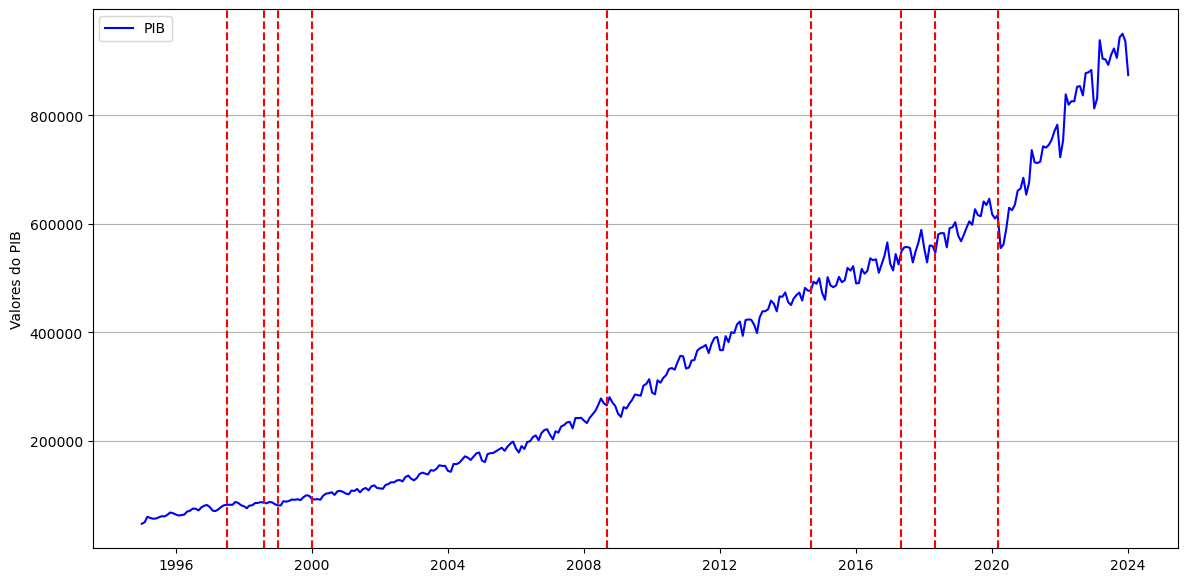

In [31]:
from datetime import datetime
plt.figure(figsize=(14, 7))

plt.plot(pib_br['Data'], pib_br['PIB Brasil'], label='PIB', color='blue')

plt.title('')
plt.xlabel('')
plt.ylabel('Valores do PIB')
plt.legend()

plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

datas_verticais = [
    datetime(1997, 7, 1),   
    datetime(1998, 8, 1),   
    datetime(1999, 1, 1),
    datetime(2000, 1, 1),
    datetime(2008, 9, 1),
    datetime(2014, 9, 1),
    datetime(2017, 5, 1),
    datetime(2018, 5, 1),
    datetime(2020, 3, 1)
]

for data in datas_verticais:
    plt.axvline(x=data, color='red', linestyle='--')

plt.show()

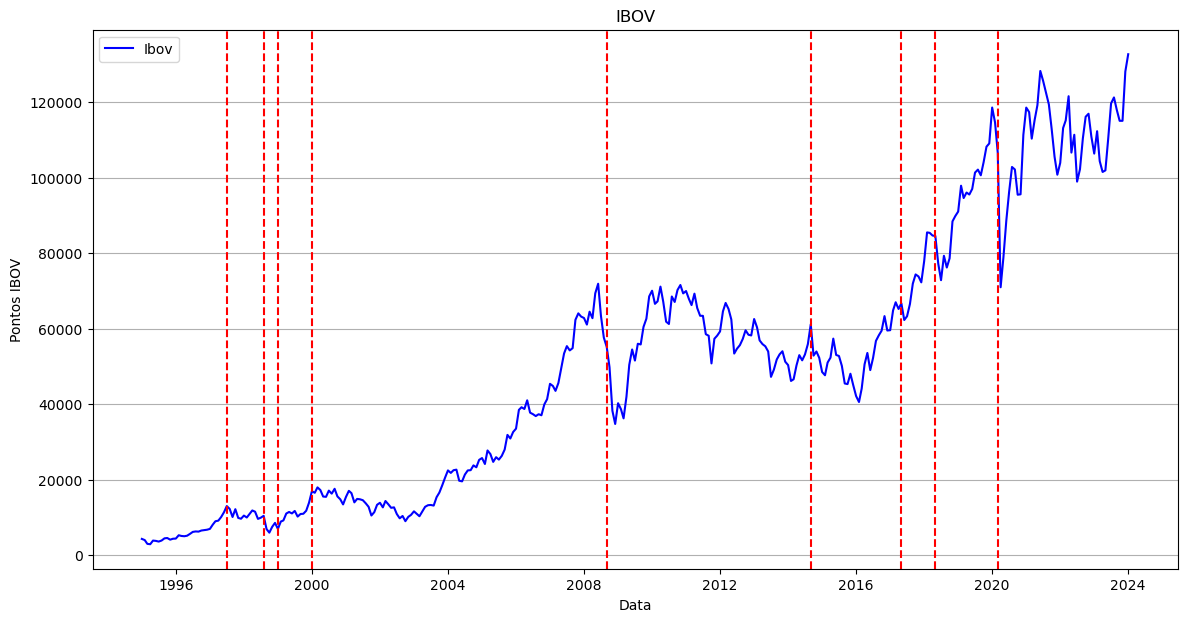

In [32]:
plt.figure(figsize=(14, 7))

plt.plot(ibov['Data'], ibov['Fechamento IBOV'], label='Ibov', color='blue')

plt.title('IBOV')
plt.xlabel('Data')
plt.ylabel('Pontos IBOV')
plt.legend()

plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

datas_verticais = [
    datetime(1997, 7, 1),   
    datetime(1998, 8, 1),   
    datetime(1999, 1, 1),
    datetime(2000, 1, 1),
    datetime(2008, 9, 1),
    datetime(2014, 9, 1),
    datetime(2017, 5, 1),
    datetime(2018, 5, 1),
    datetime(2020, 3, 1)
]

for data in datas_verticais:
    plt.axvline(x=data, color='red', linestyle='--')

plt.show()

In [15]:
def padronizar_percentual(df, colunas):
    for coluna in colunas:
        
        first_value = df[coluna].iloc[0]

        
        df[coluna] = (df[coluna] / first_value)

    return df

ibov2 = padronizar_percentual(ibov, ['Fechamento IBOV'])

pib_br2 = padronizar_percentual(pib_br, ['PIB Brasil'])

print(ibov2)

print(pib_br2)

          Data  Fechamento IBOV
21  1995-01-01         1.000000
22  1995-02-01         0.927645
23  1995-03-01         0.694978
24  1995-04-01         0.672751
25  1995-05-01         0.897814
..         ...              ...
365 2023-09-01        27.410602
366 2023-10-01        26.751221
367 2023-11-01        26.750291
368 2023-12-01        29.784469
369 2024-01-01        30.852592

[349 rows x 2 columns]
          Data  PIB Brasil
0   1995-01-01    1.000000
1   1995-02-01    1.062215
2   1995-03-01    1.276336
3   1995-04-01    1.228816
4   1995-05-01    1.198218
..         ...         ...
344 2023-09-01   19.264358
345 2023-10-01   20.073236
346 2023-11-01   20.211644
347 2023-12-01   19.919768
348 2024-01-01   18.592897

[349 rows x 2 columns]


In [16]:
merge_dados = pd.merge(pib_br2, ibov2, on='Data')

print(merge_dados)

print(merge_dados.dtypes)

          Data  PIB Brasil  Fechamento IBOV
0   1995-01-01    1.000000         1.000000
1   1995-02-01    1.062215         0.927645
2   1995-03-01    1.276336         0.694978
3   1995-04-01    1.228816         0.672751
4   1995-05-01    1.198218         0.897814
..         ...         ...              ...
344 2023-09-01   19.264358        27.410602
345 2023-10-01   20.073236        26.751221
346 2023-11-01   20.211644        26.750291
347 2023-12-01   19.919768        29.784469
348 2024-01-01   18.592897        30.852592

[349 rows x 3 columns]
Data               datetime64[ns]
PIB Brasil                float64
Fechamento IBOV           float64
dtype: object


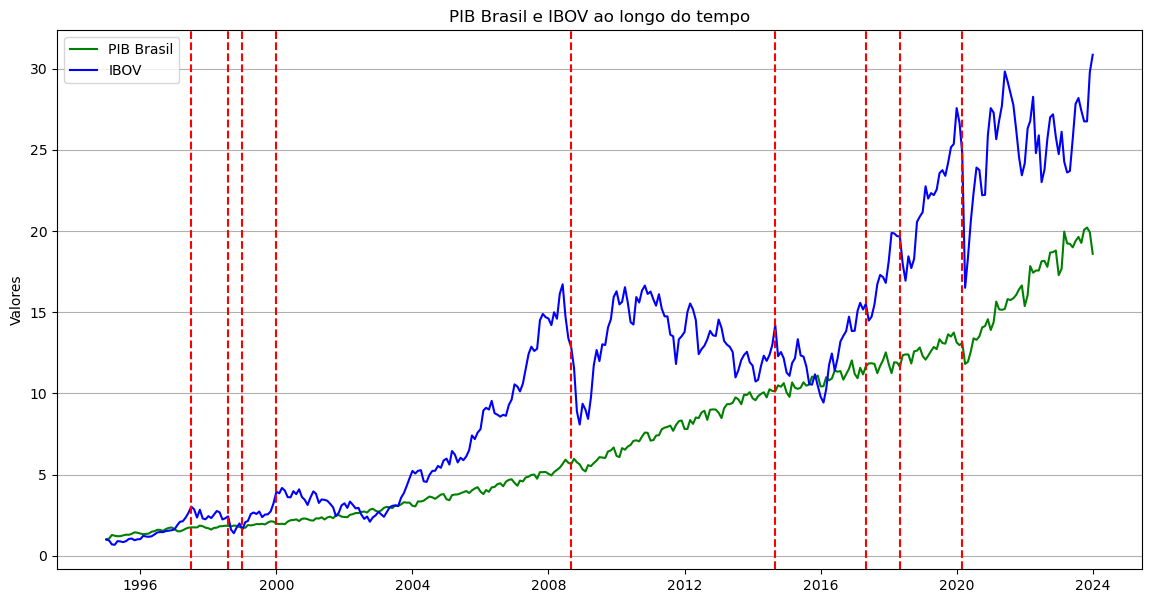

In [29]:
plt.figure(figsize=(14, 7))

plt.plot(merge_dados['Data'], merge_dados['PIB Brasil'], label='PIB Brasil', color='green')
plt.plot(merge_dados['Data'], merge_dados['Fechamento IBOV'], label='IBOV', color='blue')


plt.title('PIB Brasil e IBOV ao longo do tempo')
plt.xlabel('')
plt.ylabel('Valores')
plt.legend()

plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

datas_verticais = [
    datetime(1997, 7, 1),   
    datetime(1998, 8, 1),   
    datetime(1999, 1, 1),
    datetime(2000, 1, 1),
    datetime(2008, 9, 1),
    datetime(2014, 9, 1),
    datetime(2017, 5, 1),
    datetime(2018, 5, 1),
    datetime(2020, 3, 1)
]

for data in datas_verticais:
    plt.axvline(x=data, color='red', linestyle='--')

plt.show()